In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [66]:
rawdata=pd.read_csv('Dummy variables.csv')
data=rawdata.copy()


In [69]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [68]:
data['Attendance']=data['Attendance'].map({'Yes':1,'No':0})

In [91]:
data.iloc[:,2:3]

,Attendance
0,0
1,0
2,0
3,0
4,0
...,...
79,1
80,1
81,0
82,1


In [70]:
y=data['GPA']
x1=data[['Attendance','SAT']]

In [72]:
x=sm.add_constant(x1)

In [73]:
model=sm.OLS(y,x).fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.19e-15
Time:                        17:17:32   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
yhatyes=data['SAT']*0.0014+0.8665
yhatno=data['SAT']*0.0014+0.6439

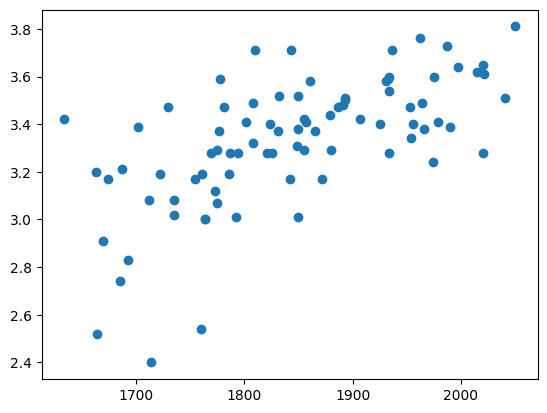

In [76]:
plt.scatter(data['SAT'],y)
plt.show()

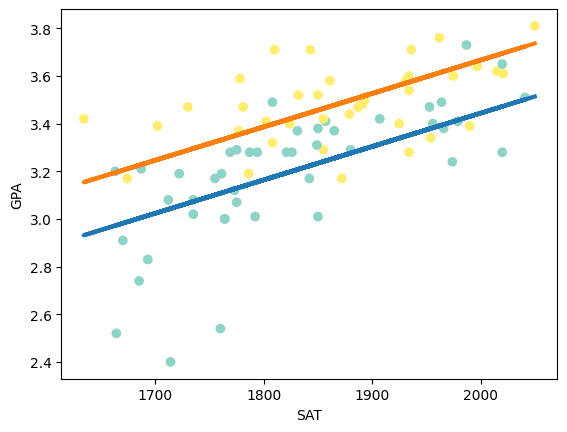

In [77]:
plt.scatter(data['SAT'],data['GPA'],c=data['Attendance'],cmap='Set3')
fig=plt.plot(data['SAT'],yhatno,lw=3)
fig=plt.plot(data['SAT'],yhatyes,lw=3)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [87]:
pdata=pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.19e-15
Time:                        17:23:21   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
pdata=pdata[['const','Attendance','SAT']]
pdata.rename(index={0:'amin',1:'zahra'},inplace=True)
pdata

,const,Attendance,SAT
amin,1,0,1700
zahra,1,1,1670


In [97]:
perdiction=model.predict(pdata)
perdiction

amin     3.023513
zahra    3.204163
dtype: float64

In [101]:
pdatset=pd.DataFrame({'perdiction':perdiction})
newdata=pdata.join(pdatset)
newdata

,const,Attendance,SAT,perdiction
amin,1,0,1700,3.023513
zahra,1,1,1670,3.204163
